In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка данных

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте линейный график динамики объема продаж всех игр жанра "Sports" в Японии. Задайте графику размер 12 на 6

C:\Users\fabr6\AppData\Local\Temp\ipykernel_8064\1271536024.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_JP = df[df['Genre'] == 'Sports'].groupby('Year').agg('sum')


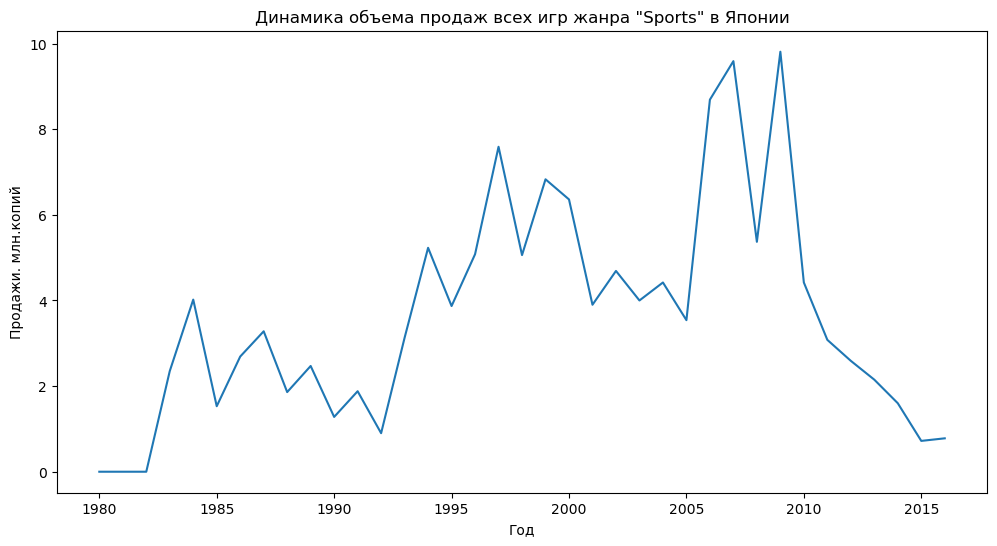

In [3]:
flg, ax = plt.subplots(figsize=(12, 6))

sales_JP = df[df['Genre'] == 'Sports'].groupby('Year').agg('sum')
ax.plot(sales_JP.index, sales_JP['JP_Sales'])
ax.set_title('Динамика объема продаж всех игр жанра "Sports" в Японии')
ax.set_xlabel('Год')
ax.set_ylabel('Продажи. млн.копий')

plt.show()

### Задача 2

В одних координатных осях постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

C:\Users\fabr6\AppData\Local\Temp\ipykernel_8064\2111862111.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_atelier = df[df['Publisher'] == 'Activision'].groupby('Year').agg('sum')


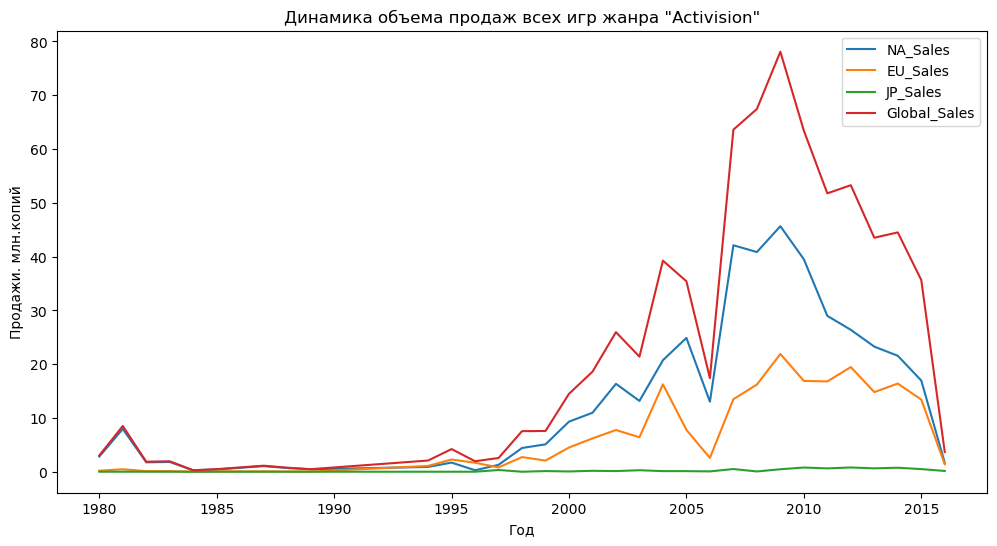

In [4]:
flg, ax = plt.subplots(figsize=(12, 6))

sales_atelier = df[df['Publisher'] == 'Activision'].groupby('Year').agg('sum')

for atelier in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']:  
    ax.plot(sales_atelier.index, sales_atelier[atelier], label=atelier)

ax.set_title('Динамика объема продаж всех игр жанра "Activision"')
ax.set_xlabel('Год')
ax.set_ylabel('Продажи. млн.копий')
ax.legend()

plt.show()

### Задача 3

В цикле (т.е. на разных координатных осях) постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

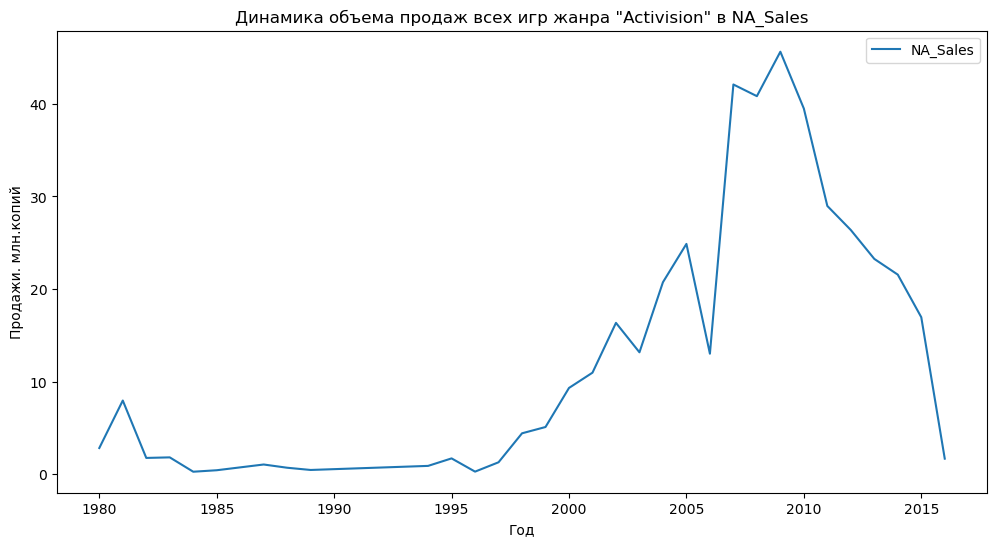

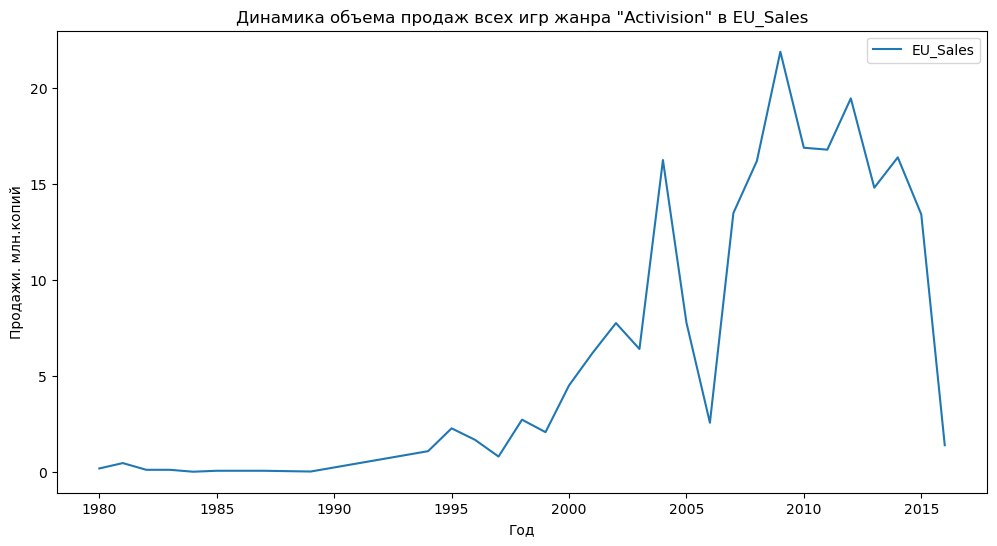

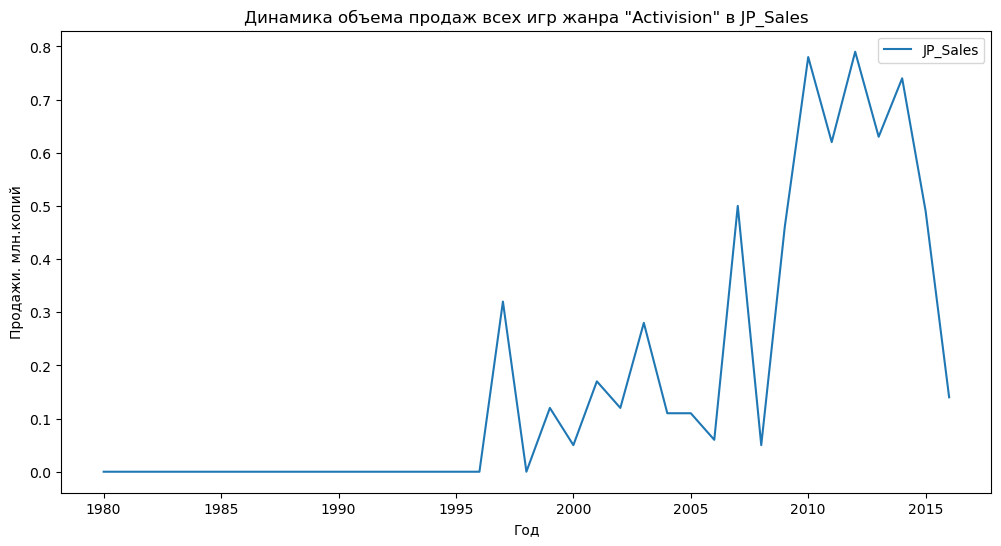

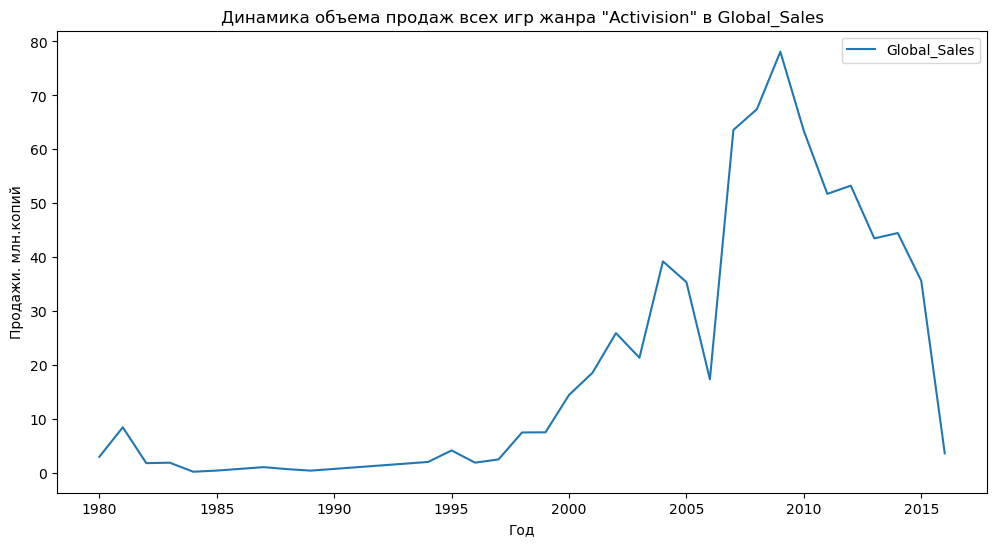

In [5]:
for atelier in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']:  
    flg, ax = plt.subplots(figsize=(12, 6))
    ax.plot(sales_atelier.index, sales_atelier[atelier], label=atelier) 

    ax.set_title('Динамика объема продаж всех игр жанра "Activision" в ' + atelier)
    ax.set_xlabel('Год')
    ax.set_ylabel('Продажи. млн.копий')
    ax.legend()

plt.show()

### Задача 4

Постройте такие же линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире на одном полотне в сетке 2 на 2 графика. Итоговое полотно сделайте размером 12 на 12. Все графики должны разделять оси X и Y

C:\Users\fabr6\AppData\Local\Temp\ipykernel_8064\1935060937.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_atelier = df[df['Publisher'] == 'Activision'].groupby('Year').agg('sum')


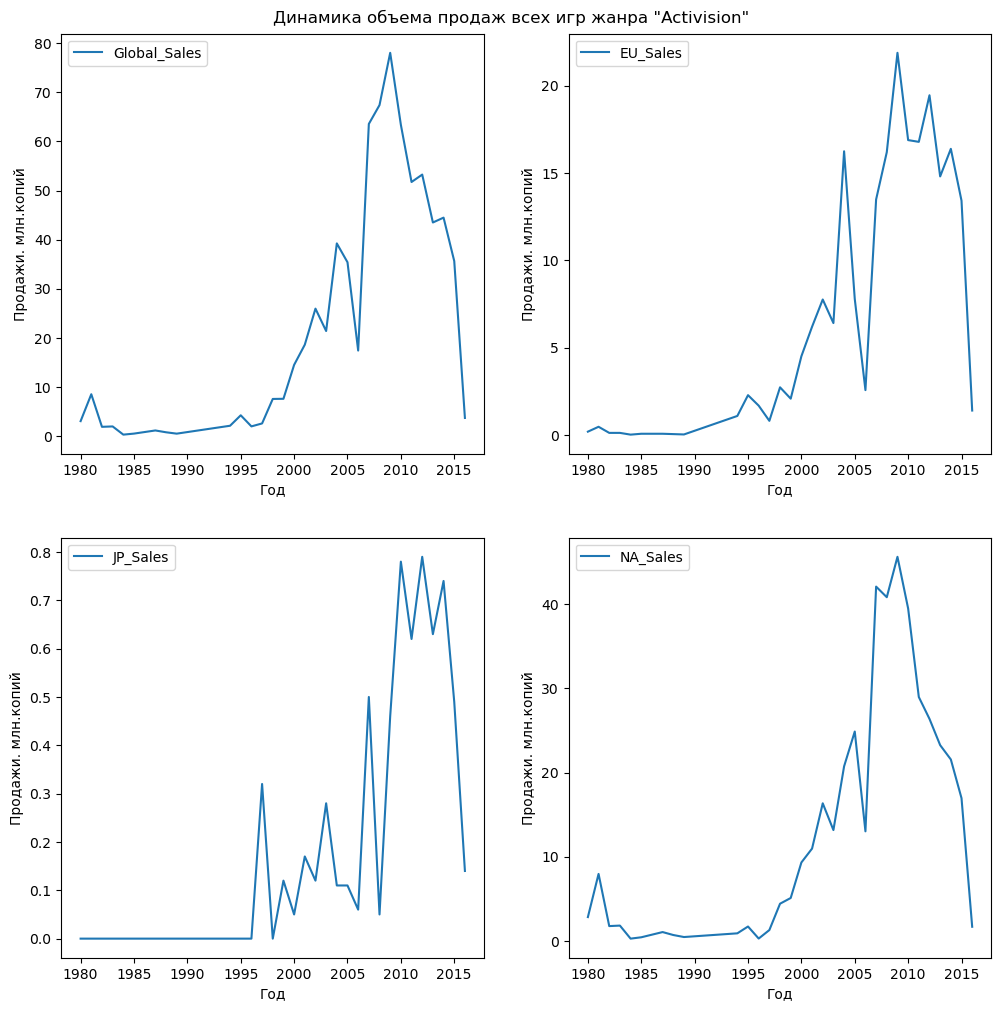

In [6]:
flg, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

sales_atelier = df[df['Publisher'] == 'Activision'].groupby('Year').agg('sum')
region = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']

for i, atelier in enumerate(axs):
    for j, x in enumerate(atelier):
        elem = region.pop()
        axs[j][i].plot(sales_atelier.index, sales_atelier[elem], label=elem) 
        axs[j][i].set_xlabel('Год')
        axs[j][i].set_ylabel('Продажи. млн.копий')
        axs[j][i].legend()

flg.suptitle('Динамика объема продаж всех игр жанра "Activision"' , y=0.9)

plt.show()

### Задача 5

В одной координатной сетке постройте 2 гистограммы распределения мировых продаж игр издателей "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года (включая 2010 год). Графики сделайте полупрозрачными, отсечки должны быть общими и соответствовать ширине столбцов обоих графиков

C:\Users\fabr6\AppData\Local\Temp\ipykernel_8064\1655953584.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  atelier_MGS = df[df['Publisher'] == 'Microsoft Game Studios'][df['Year'] >= 2010]['Global_Sales']
C:\Users\fabr6\AppData\Local\Temp\ipykernel_8064\1655953584.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  atelier_TTI = df[df['Publisher'] == 'Take-Two Interactive'][df['Year'] >= 2010]['Global_Sales']


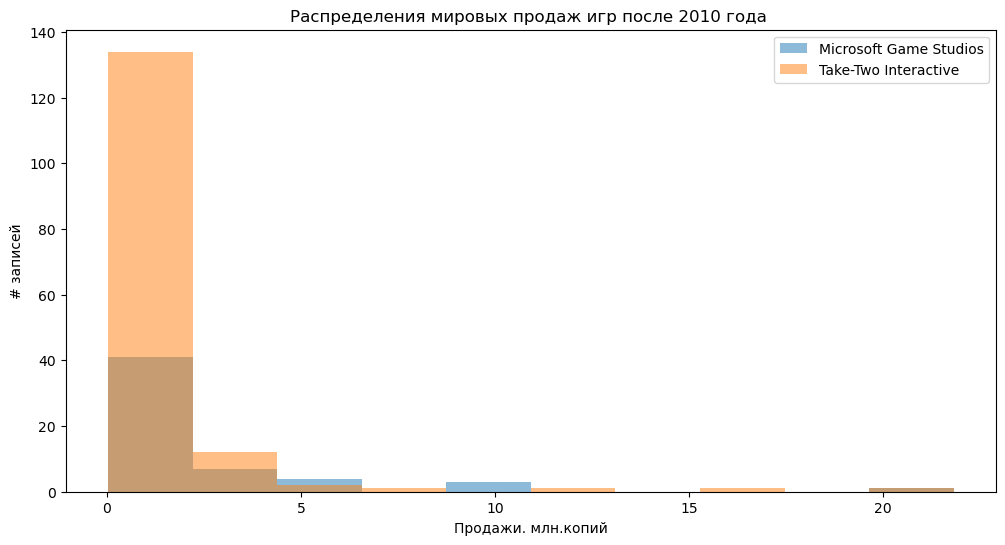

In [7]:
flg, ax = plt.subplots(figsize=(12, 6))

atelier_MGS = df[df['Publisher'] == 'Microsoft Game Studios'][df['Year'] >= 2010]['Global_Sales']
atelier_TTI = df[df['Publisher'] == 'Take-Two Interactive'][df['Year'] >= 2010]['Global_Sales']

_, bins, _ = ax.hist(atelier_MGS, label='Microsoft Game Studios', alpha=0.5)
ax.hist(atelier_TTI, label='Take-Two Interactive', bins=bins, alpha=0.5)
ax.set_title('Распределения мировых продаж игр после 2010 года ')
ax.set_xlabel('Продажи. млн.копий')
ax.set_ylabel('# записей')
ax.legend()

plt.show()

### Задача 6

Определите 5 платформ, для которых в Японии было продано больше всего игр за все время. Проиллюстрируйте величину продаж на столбчатой диаграмме, столбец с самым высоким значением окрасьте зеленым, а с самым низким - красным

C:\Users\fabr6\AppData\Local\Temp\ipykernel_8064\300725793.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  publisher = df.groupby('Platform').agg('sum').sort_values('JP_Sales', ascending=False).nlargest(5, ['JP_Sales'])


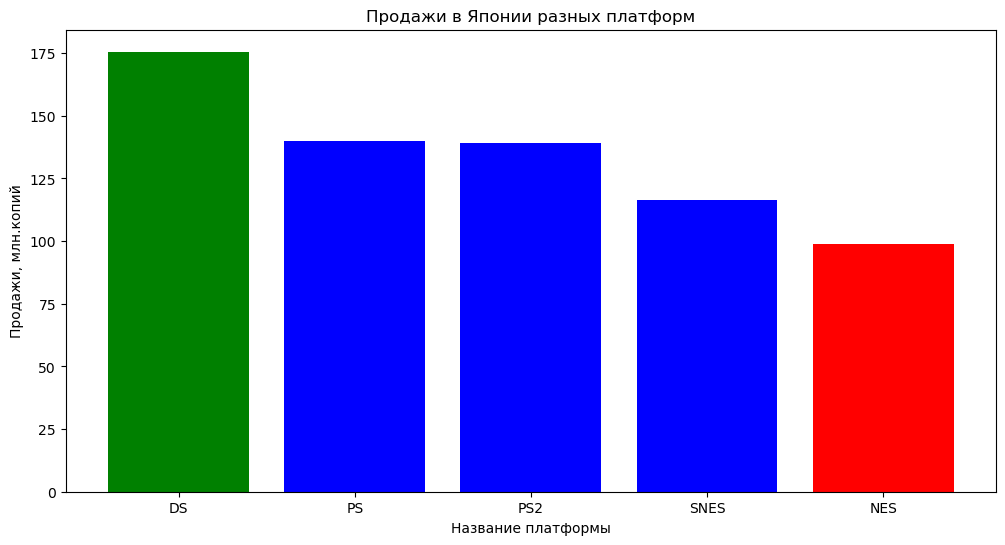

In [8]:
flg, ax = plt.subplots(figsize=(12, 6))

publisher = df.groupby('Platform').agg('sum').sort_values('JP_Sales', ascending=False).nlargest(5, ['JP_Sales'])
colors = []

for i_elem in publisher['JP_Sales']:
    if i_elem == publisher['JP_Sales'].max():
        colors.append('green')
    elif i_elem == publisher['JP_Sales'].min():
        colors.append('red')
    else:
        colors.append('blue')
        
ax.bar(publisher.index, publisher['JP_Sales'], color=colors)
ax.set_title('Продажи в Японии разных платформ')
ax.set_xlabel('Название платформы')
ax.set_ylabel('Продажи, млн.копий')

plt.show()

## Дополнительные (необязательные) задачи


### Задача 7

Постройте линейный график динамики количества игр, выпускаемых Nintendo, по годам. С помощью numpy или pandas определите промежуток, в который издатель каждый год выпускал больше 35 игр, и подсветите этот промежуток времени с помощью зеленого полупрозрачного прямоугольника

C:\Users\fabr6\AppData\Local\Temp\ipykernel_8064\4149199337.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_Nintendo = df[df['Publisher'] == 'Nintendo'].groupby('Year').agg('sum')


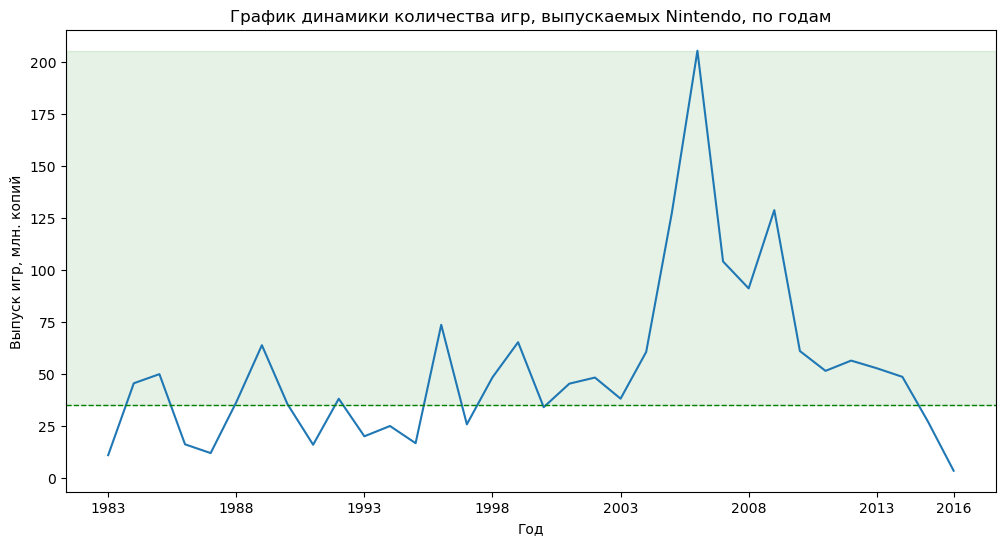

In [9]:
flg, ax = plt.subplots(figsize=(12, 6))

sales_Nintendo = df[df['Publisher'] == 'Nintendo'].groupby('Year').agg('sum')

ax.plot(sales_Nintendo.index, sales_Nintendo['Global_Sales'])
ax.set_title('График динамики количества игр, выпускаемых Nintendo, по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Выпуск игр, млн. копий')
ax.set_xticks(list(range(int(sales_Nintendo.index.min()), int(sales_Nintendo.index.max()), 5)) + [sales_Nintendo.index.max()])
ax.axhline(35, color='green', linewidth=1, linestyle='--')
ax.axhspan(ymin=35, ymax=sales_Nintendo['Global_Sales'].max(), color='green', alpha=0.1)

plt.show()

### Задача 8

Определите 3 жанра и 4 издателя с самыми большими продажами игр в мире за все время. Постройте сетку графиков 4 на 3, в каждой ячейке постройте точечный график, проверяющий зависимость общемировых продаж от продаж в Северной Америке для каждой пары (жанр, издатель). Размер итогового полотна определите самостоятельно таким образом, чтобы все графики были видны

C:\Users\fabr6\AppData\Local\Temp\ipykernel_8064\4073996990.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genre = df.groupby('Genre').agg('sum').nlargest(3, 'Global_Sales')
C:\Users\fabr6\AppData\Local\Temp\ipykernel_8064\4073996990.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  publisher = df[df['Genre'] == i_genre].groupby('Publisher').agg('sum').nlargest(4, 'Global_Sales')
C:\Users\fabr6\AppData\Local\Temp\ipykernel_8064\4073996990.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify 

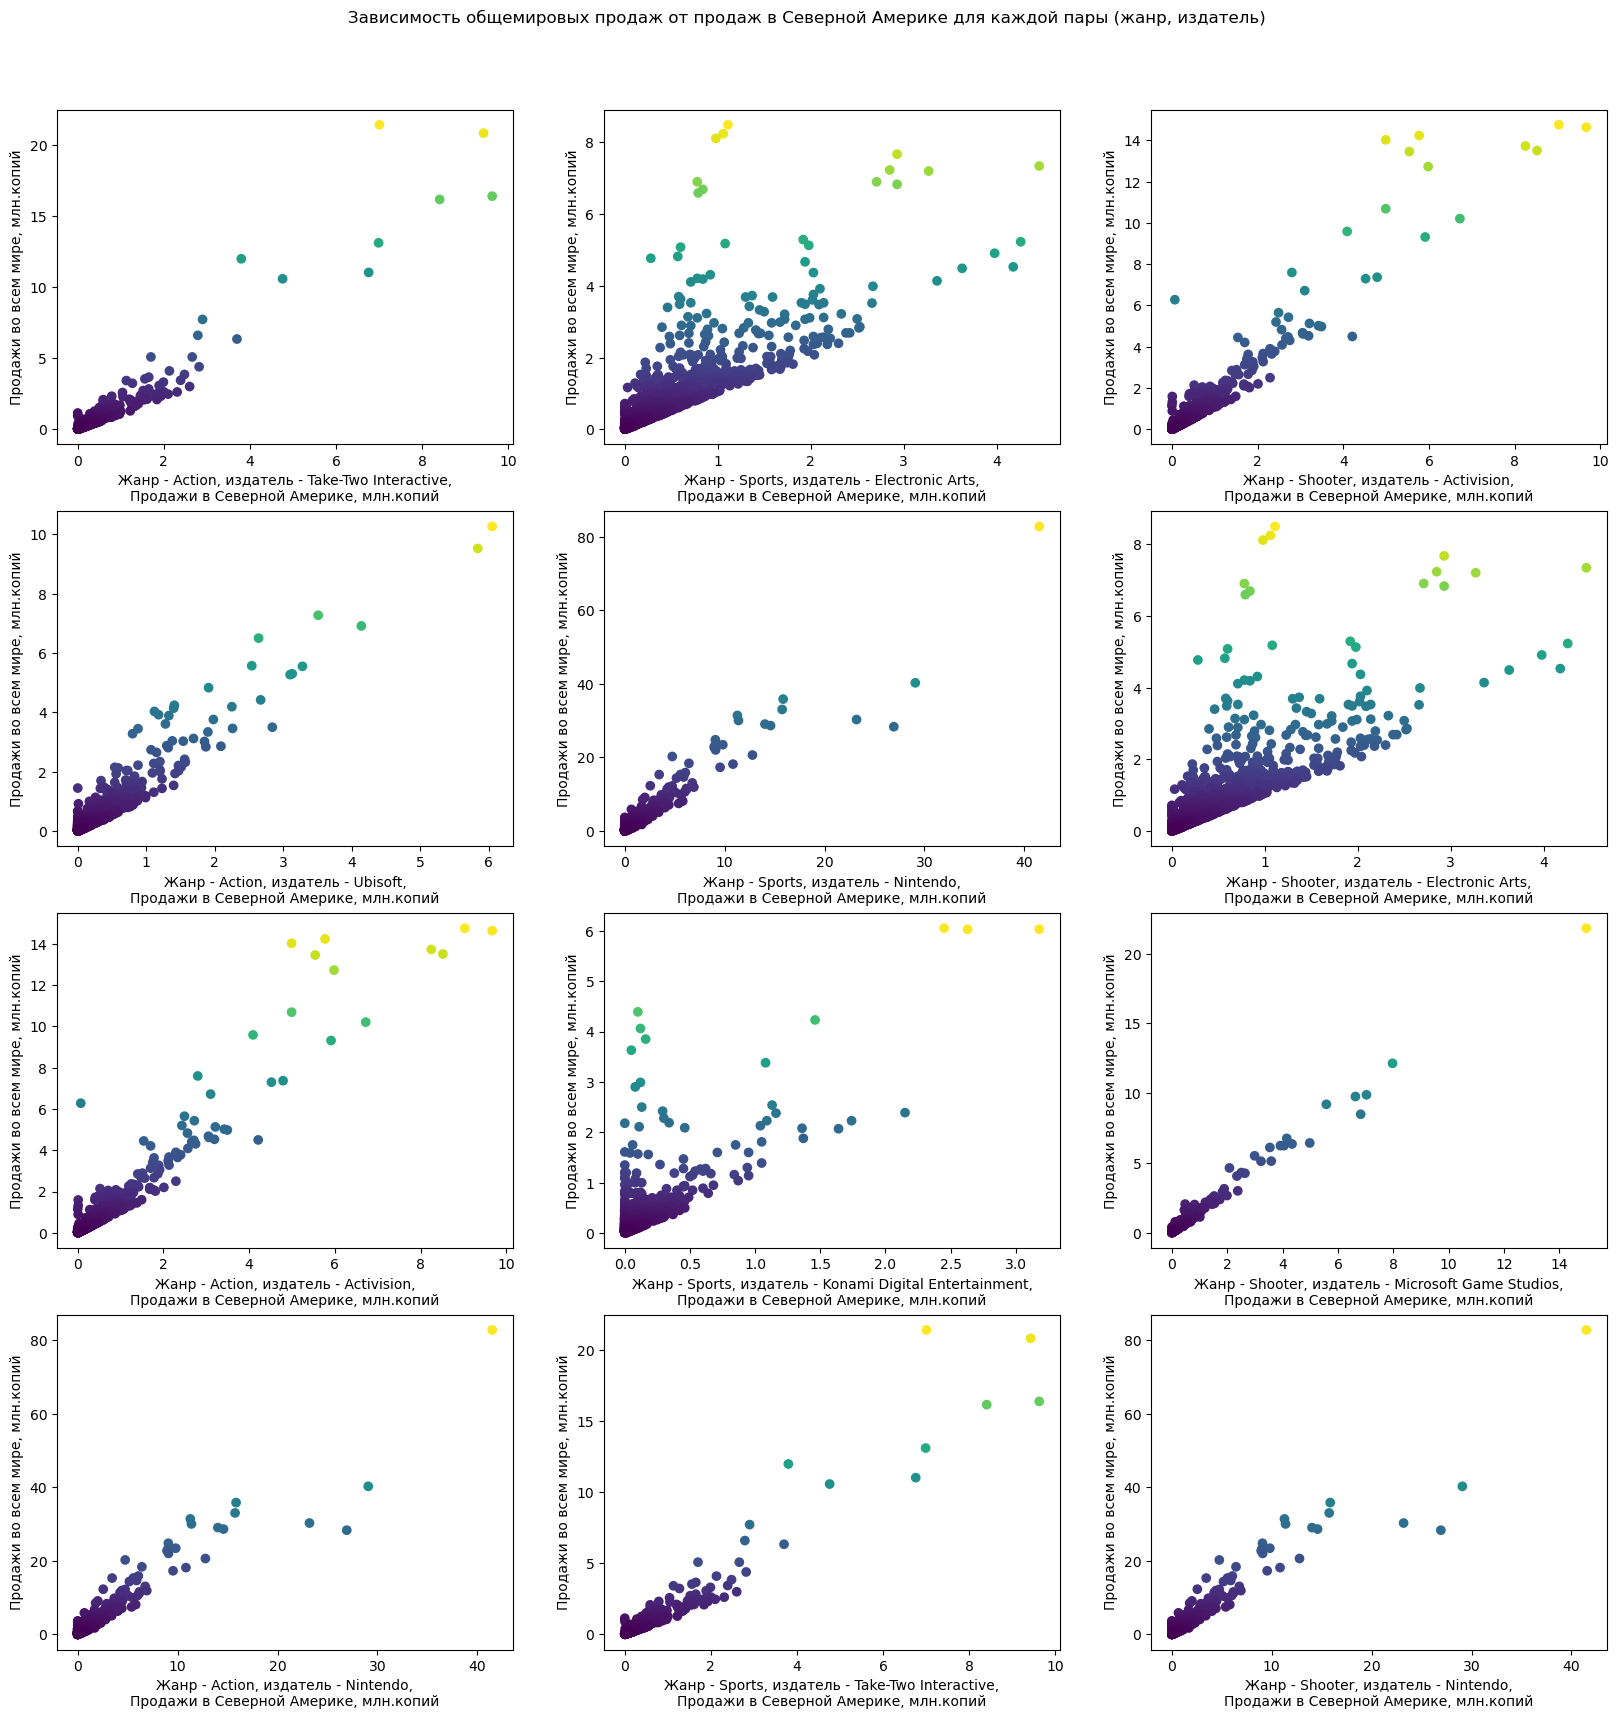

In [10]:
flg, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))

df.sort_values('Global_Sales', ascending=False)
genre = df.groupby('Genre').agg('sum').nlargest(3, 'Global_Sales')

for idx, i_genre in enumerate(genre.index):
    publisher = df[df['Genre'] == i_genre].groupby('Publisher').agg('sum').nlargest(4, 'Global_Sales')
    for i, i_publ in enumerate(publisher.index):
        sales_publ = df[df['Publisher'] == i_publ]
        axs[i][idx].scatter(sales_publ['NA_Sales'], sales_publ['Global_Sales'], c=sales_publ['Global_Sales'])
        axs[i][idx].set_xlabel(f'Жанр - {i_genre}, издатель - {i_publ},\nПродажи в Северной Америке, млн.копий')
        axs[i][idx].set_ylabel('Продажи во всем мире, млн.копий')    
        
flg.suptitle('Зависимость общемировых продаж от продаж в Северной Америке для каждой пары (жанр, издатель)', y=0.93)
plt.show()